In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 2: основные операции

- [Обзор типов данных Pandas](https://dfedorov.spb.ru/pandas/Обзор%20типов%20данных%20pandas.html)
- [Как извлечь год из даты и времени в Pandas?](https://bestprogrammer.ru/programmirovanie-i-razrabotka/kak-izvlech-god-iz-daty-i-vremeni-v-pandas)

Мы уверены: вы хорошо понимаете, что функциональные возможности библиотеки Pandas этим не ограничиваются. Давайте узнаем побольше о том, для решения каких еще задач можно использовать эту библиотеку.

В этом упражнении вы будете работать с тем же самым логом посещения пользователей страницы, включая их временные метки.

<h2>
1. Создайте датафрейм под названием views с двумя столбцами datetime и user, считав тот же самый файл feed-views.log.

- Преобразуйте datetime в datetime64[ns] Dtype;

- извлеките год, месяц, день, час, минуты и секунды из значений этого столбца в новые столбцы.

In [2]:
import pandas as pd

In [3]:
# создаем датафрейм

views = pd.read_csv('/content/drive/MyDrive/School21/day10/task2/data/feed-views.log', 
                    sep = '\t', 
                    names=['datetime', 'user'])
views

,datetime,user
0,2020-04-17 12:01:08.463179,artem
1,2020-04-17 12:01:23.743946,artem
2,2020-04-17 12:27:30.646665,artem
3,2020-04-17 12:35:44.884757,artem
4,2020-04-17 12:35:52.735016,artem
...,...,...
1071,2020-05-21 18:45:20.441142,valentina
1072,2020-05-21 23:03:06.457819,maxim
1073,2020-05-21 23:23:49.995349,pavel
1074,2020-05-21 23:49:22.386789,artem


In [4]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  1076 non-null   object
 1   user      1076 non-null   object
dtypes: object(2)
memory usage: 16.9+ KB


In [5]:
# Преобразуйте datetime в datetime64[ns] Dtype

views['datetime'] = pd.to_datetime(views['datetime'])
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1076 non-null   datetime64[ns]
 1   user      1076 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.9+ KB


In [6]:
# извлеките год, месяц, день, час, минуты и секунды из значений этого столбца в новые столбцы
# (year, month, day, hour, minute, second)

views['year'] = pd.DatetimeIndex(views['datetime']).year
views['month'] = pd.DatetimeIndex(views['datetime']).month
views['day'] = pd.DatetimeIndex(views['datetime']).day
views['hour'] = pd.DatetimeIndex(views['datetime']).hour
views['minute'] = pd.DatetimeIndex(views['datetime']).minute
views['second'] = pd.DatetimeIndex(views['datetime']).second

In [7]:
views

,datetime,user,year,month,day,hour,minute,second
0,2020-04-17 12:01:08.463179,artem,2020,4,17,12,1,8
1,2020-04-17 12:01:23.743946,artem,2020,4,17,12,1,23
2,2020-04-17 12:27:30.646665,artem,2020,4,17,12,27,30
3,2020-04-17 12:35:44.884757,artem,2020,4,17,12,35,44
4,2020-04-17 12:35:52.735016,artem,2020,4,17,12,35,52
...,...,...,...,...,...,...,...,...
1071,2020-05-21 18:45:20.441142,valentina,2020,5,21,18,45,20
1072,2020-05-21 23:03:06.457819,maxim,2020,5,21,23,3,6
1073,2020-05-21 23:23:49.995349,pavel,2020,5,21,23,23,49
1074,2020-05-21 23:49:22.386789,artem,2020,5,21,23,49,22


<h2>
2. Создайте новый столбец daytime.

- Переведите время в название части суток: если значение **часа** находится в рамках определенного интервала. Например, afternoon, если значение часа больше 11 и меньше или равно 17;

  * 0:00–03:59 — night, 04:00–06:59 — early morning, 07:00–10:59 — morning, 11:00–16:59 — afternoon, 17:00–19:59 — early evening, 20:00–23:59 — evening.


- используйте метод cut для решения этой подзадачи;
- назначьте столбец user в качестве индекса.

In [8]:
views['daytime'] = pd.cut(views['hour'], 
                          bins=[0, 4, 7, 11, 17, 20, 24],
                          labels=['night', 'early morning', 'morning', 'afternoon', 'early evening', 'evening'], 
                          right=False)
views.set_index('user', inplace=True)

In [9]:
views

,datetime,year,month,day,hour,minute,second,daytime
user,,,,,,,,
artem,2020-04-17 12:01:08.463179,2020,4,17,12,1,8,afternoon
artem,2020-04-17 12:01:23.743946,2020,4,17,12,1,23,afternoon
artem,2020-04-17 12:27:30.646665,2020,4,17,12,27,30,afternoon
artem,2020-04-17 12:35:44.884757,2020,4,17,12,35,44,afternoon
artem,2020-04-17 12:35:52.735016,2020,4,17,12,35,52,afternoon
...,...,...,...,...,...,...,...,...
valentina,2020-05-21 18:45:20.441142,2020,5,21,18,45,20,early evening
maxim,2020-05-21 23:03:06.457819,2020,5,21,23,3,6,evening
pavel,2020-05-21 23:23:49.995349,2020,5,21,23,23,49,evening


<h2>
3. Подсчитайте количество элементов в вашем датафрейме.

- Используйте метод count();
- подсчитайте количество элементов в каждой категории частей суток, используя метод value_counts().

In [13]:
views.count()

datetime    1076
year        1076
month       1076
day         1076
hour        1076
minute      1076
second      1076
daytime     1076
dtype: int64

In [14]:
views['daytime'].value_counts()

evening          509
afternoon        252
early evening    145
night            129
morning           36
early morning      5
Name: daytime, dtype: int64

<h2>
4. Отсортируйте значения в вашем датафрейме по часам, минутам и секундам в порядке возрастания (в рамках одной команды, а не по очереди).

In [12]:
views.sort_values(by=['hour', 'minute', 'second'], inplace=True)
views

,datetime,year,month,day,hour,minute,second,daytime
user,,,,,,,,
valentina,2020-05-15 00:00:13.222265,2020,5,15,0,0,13,night
valentina,2020-05-15 00:01:05.153738,2020,5,15,0,1,5,night
pavel,2020-05-12 00:01:27.764025,2020,5,12,0,1,27,night
pavel,2020-05-12 00:01:38.444917,2020,5,12,0,1,38,night
pavel,2020-05-12 00:01:55.395042,2020,5,12,0,1,55,night
...,...,...,...,...,...,...,...,...
artem,2020-05-21 23:49:22.386789,2020,5,21,23,49,22,evening
anatoliy,2020-05-09 23:53:55.599821,2020,5,9,23,53,55,evening
pavel,2020-05-09 23:54:54.260791,2020,5,9,23,54,54,evening


<h2>
5. Рассчитайте минимальное и максимальное значения среди значений часов и моду для категорий частей суток.

- Рассчитайте максимальное значение среди значений часов для строк, в которых время суток — night;
- рассчитайте минимальное значение среди значений часов для строк, в которых время суток — morning;
- в дополнение к этому, выясните, кто посещал страницу в эти часы (подготовьте один пример пользователя);
- рассчитайте моду для hour и daytime.

In [15]:
# рассчитайте максимальное значение среди значений часов для строк, в которых время суток — night

views[['hour', 'daytime']].where(views['daytime']=='night').max()

hour         3.0
daytime    night
dtype: object

In [16]:
# рассчитайте минимальное значение среди значений часов для строк, в которых время суток — morning

views[['hour', 'daytime']].where(views['daytime']=='morning').min()

hour           8.0
daytime    morning
dtype: object

In [17]:
# в дополнение к этому, выясните, кто посещал страницу в эти часы (подготовьте один пример пользователя)

views.loc[views['hour'] == 3].head(1)

,datetime,year,month,day,hour,minute,second,daytime
user,,,,,,,,
konstantin,2020-04-19 03:23:35.471598,2020,4,19,3,23,35,night


In [18]:
views.loc[views['hour'] == 8].head(1)

,datetime,year,month,day,hour,minute,second,daytime
user,,,,,,,,
alexander,2020-05-15 08:16:03.918402,2020,5,15,8,16,3,morning


In [19]:
# рассчитайте моду для hour и daytime

views[['hour', 'daytime']].mode()

,hour,daytime
0,22,evening


<h2>
6. Отобразите 3 самых ранних часа утром вместе с соответствующими именами пользователей, а также 3 самых поздних часа и имена пользователей с помощью nsmallest() и nlargest().

In [20]:
views[['hour', 'daytime']].nsmallest(3, columns=['hour'])

,hour,daytime
user,,
valentina,0,night
valentina,0,night
pavel,0,night


In [21]:
views[['hour', 'daytime']].nlargest(3, columns=['hour'])

,hour,daytime
user,,
ekaterina,23,evening
ekaterina,23,evening
ekaterina,23,evening


<h2>
7. Используйте метод describe(), чтобы получить базовую статистику по столбцам.

- Дополнительно определите самый популярный интервал посещения страницы: вычислите интерквартильный диапазон для часа путем извлечения значений из результата метода describe() и сохраните полученные данные в переменной iqr.

- [Расчет квартилей для интервального ряда:](https://studfile.net/preview/5316597/page:4/)
- [Расчет квартилей для интервального ряда(смотреть)](https://дмш-самрина.рф/raznoe/kvartil-eto-v-statistike-strukturnye-srednie-moda-mediana-kvartil-decil.html)

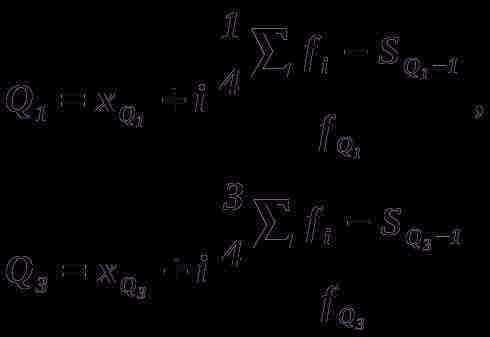

In [22]:
# получаем базовую статистику по столбцам

stat_all = views.describe()
stat_all

,year,month,day,hour,minute,second
count,1076.0,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,2020.0,4.870818,13.552974,16.249071,29.629182,29.500929
std,0.0,0.335557,4.906567,6.955490,17.689388,17.405506
min,2020.0,4.000000,1.000000,0.000000,0.000000,0.000000
25%,2020.0,5.000000,11.000000,13.000000,14.000000,14.000000
50%,2020.0,5.000000,13.000000,19.000000,29.000000,30.000000
75%,2020.0,5.000000,15.000000,22.000000,46.000000,45.000000
max,2020.0,5.000000,30.000000,23.000000,59.000000,59.000000


In [23]:
# Дополнительно определите самый популярный интервал посещения страницы: 
# вычислите интерквартильный диапазон для часа путем извлечения значений из результата метода describe() и 
# сохраните полученные данные в переменной iqr.

stat_hour = views['hour'].describe()
stat_hour

count    1076.000000
mean       16.249071
std         6.955490
min         0.000000
25%        13.000000
50%        19.000000
75%        22.000000
max        23.000000
Name: hour, dtype: float64

In [24]:
iqr = stat_hour["75%"] - stat_hour["25%"]
iqr

9.0